<a href="https://colab.research.google.com/github/Poohi5/CMPE297/blob/master/Assignment_2/Assignment_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build a linear classifier using low level tensorflow code and Gradient tape 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
x = tf.constant(8.0) 
  
# Using GradientTape 
with tf.GradientTape() as test: 
  test.watch(x) 
  y = x * x 
  
# Computing gradient 
res  = test.gradient(y, x)  
  
# Printing result 
print("res: ",res) 

res:  tf.Tensor(16.0, shape=(), dtype=float32)


**y = x by x, here x = 8 and since derivative of x^2 is 2x ,result is 2(18) = 16 **

In [3]:
x = tf.constant(8.0) 
  
# Using GradientTape 
with tf.GradientTape() as testnew: 
  testnew.watch(x) 
  
  # Using nested GradientTape for  
  # calculating higher order derivative 
  with tf.GradientTape() as tt: 
    tt.watch(x) 
    y = x * x * x 
  
  # Computing first order gradient 
  first_order = tt.gradient(y, x) 
  
# Computing Second order gradient 
second_order  = testnew.gradient(first_order, x)  
  
# Printing result 
print("first_order: ",first_order) 
print("second_order: ",second_order)

first_order:  tf.Tensor(192.0, shape=(), dtype=float32)
second_order:  tf.Tensor(48.0, shape=(), dtype=float32)


## Linear Classifier using GradientTape

### Here using gradient tape we can classify positive and negative samples/numbers as shown below 

#### importing required packages/libraries

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#### Next, we will generate 1000 samples of both positive and negative samples from multivariate_normal distribution

In [5]:
num_samples = 10000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)

#### Plot the samples

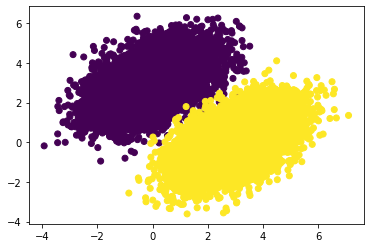

In [6]:
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

#### Linear Classifier

In [7]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

#### Train the classifier on the dataset

In [8]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0701
Epoch 1: last batch loss = 0.0498
Epoch 2: last batch loss = 0.0435
Epoch 3: last batch loss = 0.0273
Epoch 4: last batch loss = 0.0352
Epoch 5: last batch loss = 0.0237
Epoch 6: last batch loss = 0.0273
Epoch 7: last batch loss = 0.0321
Epoch 8: last batch loss = 0.0406
Epoch 9: last batch loss = 0.0213


#### Finally, show predictions

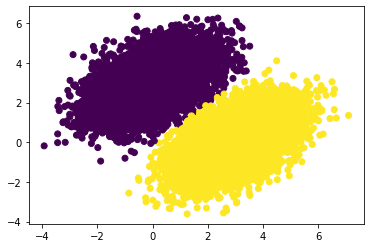

In [9]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)